# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [46]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [47]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    u=x**2
    v=numpy.sin(x)
    return u*v

Ensure your function works with numpy arrays:

In [48]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [49]:
def g(x):
    '''Analytical integral of f(x).'''
    u=2*x
    v=numpy.sin(x)
    b=(2-x**2)
    c=numpy.cos(x)
    return u*v +b*c -2

Check your solution with the same numpy array:

In [50]:
assert g(0) == 0.

In [51]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [52]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [53]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [54]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    r=(xmax-xmin)/N
    ya=[]
    yb=[]
    yc=[]
    yd=[]
    xa=xmin+r
    xb=xmin+(r/2)    
    for i in range(0, N+1):
        if i==0:
            yb.append(f(xmin))
        elif i==N:
            yc.append(f(xmax))
        elif i !=N:
            ya.append(f(xa))
            xa+=r

    for i in range(0,N):
        yd.append(f(xb))
        if r<=N:
            xb+=r
       
    I= (r/6)*(sum(yb)+4*sum(yd)+2*sum(ya)+sum(yc))
    return I

Make sure you have implemented Simpson's rule correctly:

In [55]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [56]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'The fractional error between the numerically calculated and the analytically derived result')

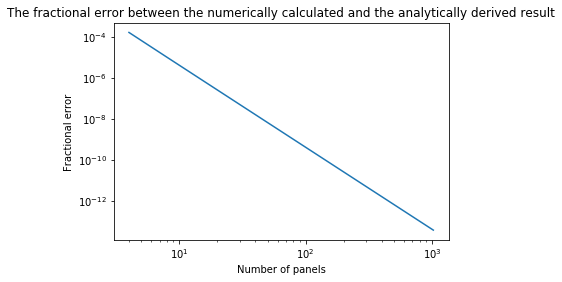

In [57]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fractional_error=[]
for i in panel_counts:
    difference=result_analytic-integrate_numeric(x0,x1,i)
    fraction=difference/result_analytic
    fractional_error.append(fraction)
plt.plot(panel_counts, fractional_error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of panels')
plt.ylabel('Fractional error')
plt.title('The fractional error between the numerically calculated and the analytically derived result')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As you increase the number of panels the result of the numerical method is more accurate. If there are too many panels though and the function isn't smooth then the accuracy decreases. Also if there is divergence then the accuracy also decreases

If the trapezium rule was being used, how would the panel
count affect accuracy? 

As you increase the number of panels in the trapezium rule the accuracy increases because the line segments are much closer to the actual function being integrated. However, it is not as accurate as the simpson rule for the same number of panels.